<a href="https://colab.research.google.com/github/absolute-nil/A-R-Robot/blob/master/09_Neural_Nets_Pretrained_Image_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%tensorflow_version 1.x
import numpy as np 
import tensorflow as tf 
import keras

from keras.preprocessing.image import img_to_array, load_img
from keras.applications.inception_resnet_v2 import InceptionResNetV2, decode_predictions, preprocess_input

from keras.applications.vgg19 import VGG19
from keras.applications.vgg19 import preprocess_input as preprocess_input_vgg19 , decode_predictions as decode_vgg19

from IPython.core.display import display

# Constants

In [0]:
FILE_1 = '01 Umbrella.jpg'
FILE_2 = '02 Couple.jpg'
FILE_3 = '03 Ocean.jpg'

# Preprocessing Images

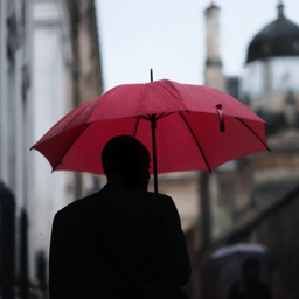

In [8]:
pic = load_img(FILE_1, target_size=(299,299))
display(pic)

In [9]:
pic_array = img_to_array(pic)
pic_array.shape

(299, 299, 3)

In [10]:
expanded = np.expand_dims(pic_array, axis=0)
expanded.shape

(1, 299, 299, 3)

In [0]:
preprocessed = preprocess_input(expanded)

In [0]:
def format_img_inceptionresnet(file):
  fitted_img = load_img(file, target_size=(299,299))
  pic_array = img_to_array(fitted_img)
  expanded_arr = np.expand_dims(pic_array, axis=0)
  return preprocess_input(expanded_arr)
  

# Load InceptionResNet

In [5]:
%%time

inception_model = InceptionResNetV2(weights='imagenet')














225214464/225209952 [==============================] - 15s 0us/step
CPU times: user 27 s, sys: 1.28 s, total: 28.3 s
Wall time: 43.5 s


In [0]:
inception_model.graph = tf.get_default_graph()

# Making Prediction

In [15]:
prediction = inception_model.predict(preprocessed)
decode_predictions(prediction)

[[('n04507155', 'umbrella', 0.82924354),
  ('n03792972', 'mountain_tent', 0.001226827),
  ('n04479046', 'trench_coat', 0.0011062961),
  ('n03788195', 'mosque', 0.001057237),
  ('n03220513', 'dome', 0.0010310997)]]

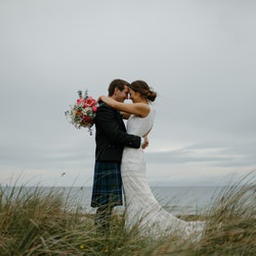

[[('n10148035', 'groom', 0.70423806),
  ('n03450230', 'gown', 0.1166958),
  ('n11879895', 'rapeseed', 0.016582685),
  ('n09421951', 'sandbar', 0.012790663),
  ('n03534580', 'hoopskirt', 0.0072878106)]]

In [17]:
data = format_img_inceptionresnet(FILE_2)
prediction = inception_model.predict(data)
display(load_img(FILE_2))
decode_predictions(prediction)

# Testing the VGG19 Model

In [0]:
def format_img_vgg19(file):
  fitted_img = load_img(file, target_size=(224,224))
  pic_array = img_to_array(fitted_img)
  expanded_arr = np.expand_dims(pic_array, axis=0)
  return preprocess_input_vgg19(expanded_arr)
  

In [20]:
vgg19_model = VGG19()

574717952/574710816 [==============================] - 35s 0us/step


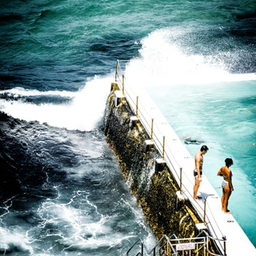

[[('n04347754', 'submarine', 0.16831148),
  ('n02894605', 'breakwater', 0.12554657),
  ('n03662601', 'lifeboat', 0.09670137),
  ('n09399592', 'promontory', 0.08424033),
  ('n02981792', 'catamaran', 0.08419343)]]

In [22]:
data = format_img_vgg19(FILE_3)
pred = vgg19_model.predict(data)
display(load_img(FILE_3))
decode_vgg19(pred)